In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('data/uspopulation.csv',index_col='DATE',parse_dates=True)

In [7]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [8]:
df.index.freq = 'MS'

In [9]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [10]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [11]:
df.shape

(96, 1)

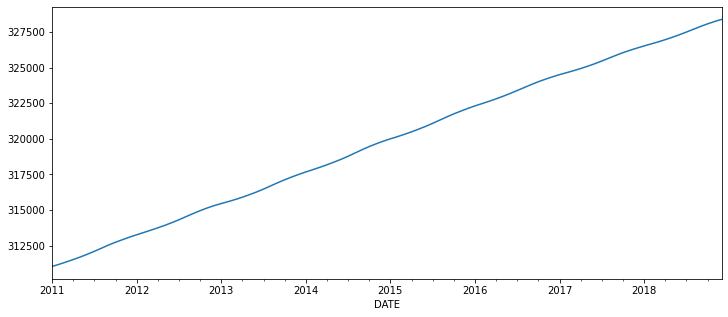

In [12]:
# plotting the data 
df['PopEst'].plot(figsize=(12,5));

In [13]:
## splitting the data into train and test
train = df.iloc[:84]
test = df.iloc[84:]

In [14]:
## imports
from statsmodels.tsa.ar_model import AR, ARResults

In [16]:
## fitting AR1 model
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1)

In [17]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [19]:
## obtaining the predictions
start = len(train)
end = len(train) +  len(test) - 1

In [20]:
prediction1 = AR1fit.predict(start=start,end=end,dynamic=False)

In [21]:
prediction1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [22]:
prediction1.rename('AR1 Predictions',inplace=True)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR1 Predictions, dtype: float64

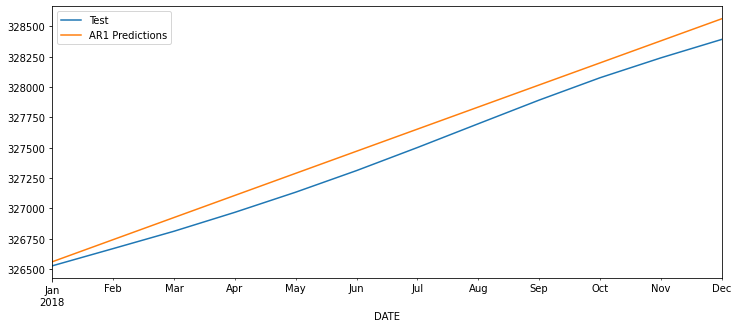

In [24]:
## plotting the test set and the predictions for order 1 AR model
test['PopEst'].plot(figsize=(12,5),label='Test',legend=True)
prediction1.plot(legend=True);

In [27]:
## checking the error quantitatively for the AR1 model
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['PopEst'],prediction1))

In [32]:
## comparing this rmse value with the average of the test set
print(f"The average of the test set is {test['PopEst'].mean()}")
print(f"The root mean squared error for the AR1 model is {np.round(rmse,3)}")

The average of the test set is 327435.5
The root mean squared error for the AR1 model is 132.097


**Error is quite less compared to the average. So the model is quite good**

In [33]:
## fitting AR2 model now
AR2fit = model.fit(maxlag=2)

In [34]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [35]:
## predicting the values for the test set
prediction2 = AR2fit.predict(start=start,end=end,dynamic=True)

In [38]:
prediction2.rename('AR2 Predictions',inplace=True)

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944949
2018-05-01    327177.719499
2018-06-01    327340.045897
2018-07-01    327502.787331
2018-08-01    327665.826848
2018-09-01    327829.064481
2018-10-01    327992.414811
2018-11-01    328155.804861
2018-12-01    328319.172309
Freq: MS, Name: AR2 Predictions, dtype: float64

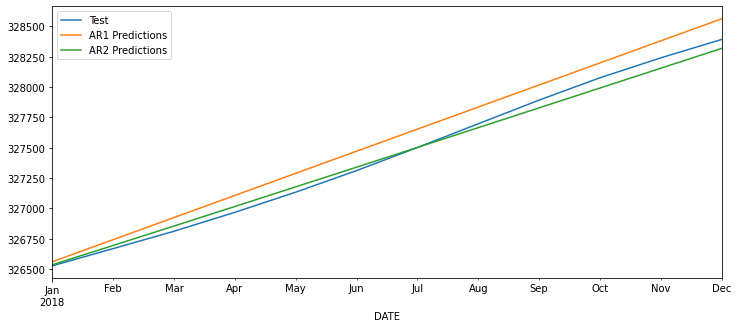

In [39]:
## plotting the predictions with the test set
test['PopEst'].plot(figsize=(12,5),label='Test',legend=True)
prediction1.plot(legend=True)
prediction2.plot(legend=True);

### Instead of choosing the order for the model ourselves, let's leave that task to the statsmodels

In [40]:
ARfit = model.fit()

In [41]:
ARfit.params

const         96.143523
L1.PopEst      2.298626
L2.PopEst     -2.027441
L3.PopEst      1.356878
L4.PopEst     -1.171630
L5.PopEst      0.816723
L6.PopEst     -0.699990
L7.PopEst      0.727004
L8.PopEst     -0.354790
L9.PopEst      0.241036
L10.PopEst    -0.179865
L11.PopEst    -0.006819
dtype: float64

In [60]:
model = AR(df['PopEst'])
ARfit = model.fit(maxlag=11)

In [61]:
prediction11 = ARfit.predict(start=start,end=end,dynamic=False)

In [62]:
prediction11.rename('AR11 Predictions',inplace=True)

DATE
2018-01-01    326523.607005
2018-02-01    326668.531545
2018-03-01    326810.722261
2018-04-01    326964.150242
2018-05-01    327138.933067
2018-06-01    327310.848072
2018-07-01    327501.073575
2018-08-01    327695.074295
2018-09-01    327891.260112
2018-10-01    328078.234005
2018-11-01    328247.066844
2018-12-01    328390.156452
Freq: MS, Name: AR11 Predictions, dtype: float64

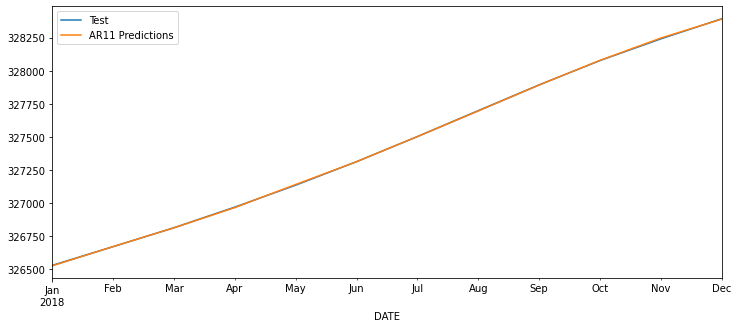

In [63]:
## plotting the predictions together
test['PopEst'].plot(figsize=(12,5),label='Test',legend=True)
# prediction1.plot(legend=True)
# prediction2.plot(legend=True)
prediction11.plot(legend=True);

In [64]:
## let's check the accuracy of the results using some quantitative method
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['PopEst'],prediction11))

In [65]:
## finding the mean of the test set
t_mean = test['PopEst'].mean()

In [66]:
print(f"The average of the test set is {t_mean}")
print(f"The root mean squared error of the test set is {np.round(rmse,3)}")

The average of the test set is 327435.5
The root mean squared error of the test set is 3.065


### Forecasting into the future

In [69]:
forecasted_values = ARfit.predict(start=len(df),end=len(df)+12,dynamic=False)

In [70]:
forecasted_values.rename('Forecasted Values',inplace=True)

2019-01-01    328536.765077
2019-02-01    328674.007917
2019-03-01    328813.066696
2019-04-01    328961.484081
2019-05-01    329123.988688
2019-06-01    329300.174105
2019-07-01    329485.616445
2019-08-01    329674.501198
2019-09-01    329860.058746
2019-10-01    330036.190633
2019-11-01    330198.872161
2019-12-01    330347.742983
2020-01-01    330486.478755
Freq: MS, Name: Forecasted Values, dtype: float64

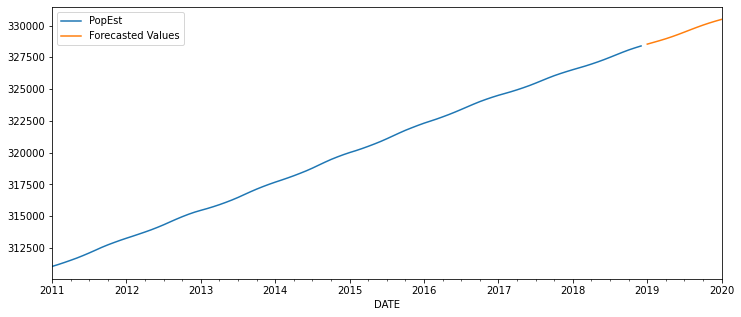

In [71]:
## plotting the forecasted values
df['PopEst'].plot(figsize=(12,5),legend=True)
forecasted_values.plot(legend=True)